In [11]:

from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator, gen_term_sequence_circuit
from pytket.circuit import Circuit,Qubit,fresh_symbol, Qubit

import numpy as np
import matplotlib.pyplot as plt

## Initial State

In [3]:
initial_state_circ = Circuit(4)
# initial_state_circ.X(0)
# initial_state_circ.X(1)

In [3]:
initial_state_circ.get_commands()

[]

## Hamiltonian
- This is a random one I found

In [5]:
# hamiltonian = QubitPauliOperator(
#     {
#         QubitPauliString(
#             [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
#             [Pauli.Z, Pauli.Z, Pauli.I, Pauli.I],
#         ): 1,
#         QubitPauliString(
#             [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
#             [Pauli.I, Pauli.Z, Pauli.Z, Pauli.I],
#         ): 1,
#         QubitPauliString(
#             [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
#             [Pauli.I, Pauli.I, Pauli.Z, Pauli.Z],
#         ): 1,
#         QubitPauliString([Qubit(0), Qubit(1), Qubit(2), Qubit(3)], [Pauli.X, Pauli.X, Pauli.X, Pauli.X]): 1,
#     }
# )
t=fresh_symbol("a")
hamiltonian = QubitPauliOperator(
    {
        QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1,
        QubitPauliString(
            [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
            [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
        ): 1,
        QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 1,
    }
)
# hamiltonian = QubitPauliOperator({QubitPauliString([Qubit(0)], [Pauli.Z]): t})

In [25]:
from pytket.circuit import PauliExpBox, CircBox

In [47]:
def ggen_term_sequence_circuit(
    operator: QubitPauliOperator,
    reference_state: Circuit,
    partition_strat: PauliPartitionStrat = PauliPartitionStrat.CommutingSets,
    colour_method: GraphColourMethod = GraphColourMethod.Lazy,
) -> Circuit:
    qps_list = list(operator._dict.keys())
    qps_list_list = term_sequence(qps_list, partition_strat, colour_method)
    n_qbs = reference_state.n_qubits
    circ = reference_state.copy()
    qbs = circ.qubits
    for out_qps_list in qps_list_list: 
        circ_to_box = Circuit(n_qbs)
        for qps in out_qps_list:
            coeff = operator[qps]
            qps_map = qps.map
            if qps_map:
                qubits = list()
                paulis = list()
                for qb, pauli in qps_map.items():
                    qubits.append(qb)
                    paulis.append(pauli)
                pbox = PauliExpBox(paulis, coeff)
                circ_to_box.add_pauliexpbox(pbox, qubits)
            else:
                circ_to_box.add_phase(-coeff / 2)
        cbox = CircBox(circ_to_box)
        circ.add_circbox(cbox, qbs)
    return circ


In [50]:
a=ggen_term_sequence_circuit(
                hamiltonian, Circuit(4), PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy
            )
Transform.DecomposeBoxes().apply(a)
a.get_commands()

[Rz(0.1) q[0];,
 H q[2];,
 H q[3];,
 V q[0];,
 CX q[3], q[2];,
 CX q[2], q[1];,
 CX q[1], q[0];,
 Rz(0.4) q[0];,
 CX q[1], q[0];,
 Vdg q[0];,
 CX q[2], q[1];,
 H q[0];,
 H q[1];,
 CX q[3], q[2];,
 CX q[1], q[0];,
 H q[2];,
 H q[3];,
 Rz(0.2) q[0];,
 CX q[1], q[0];,
 H q[0];,
 H q[1];]

In [22]:
from pytket.transform import Transform
from pytket.utils import gen_term_sequence_circuit
from pytket.partition import PauliPartitionStrat, GraphColourMethod, term_sequence

In [33]:
from pytket.pauli import QubitPauliString
q = [Qubit(i) for i in range(4)]
QubitPauliString.commutes_with(QubitPauliString([q[0], q[1], q[2], q[3]], [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X]), QubitPauliString([q[0], q[1]], [Pauli.X, Pauli.X]))

True

In [40]:
from pytket.circuit.display import render_circuit_jupyter
pbox = PauliExpBox([Pauli.I, Pauli.X, Pauli.Y, Pauli.Z], 0.75)
a = Circuit(4).add_pauliexpbox(pbox, [0, 1, 2, 3])
Transform.DecomposeBoxes().apply(a)
render_circuit_jupyter(a)

In [44]:
term_sequence(list(hamiltonian._dict.keys()),PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy)

[[(Zq[0])], [(Yq[0], Zq[1], Xq[2], Xq[3]), (Xq[0], Xq[1])]]

In [45]:
a=ggen_term_sequence_circuit(
                hamiltonian, Circuit(4), PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy
            )
Transform.DecomposeBoxes().apply(a)
a.get_commands()

TypeError: __getitem__(): incompatible function arguments. The following argument types are supported:
    1. (self: pytket._tket.pauli.QubitPauliString, arg0: pytket._tket.circuit.Qubit) -> pytket._tket.pauli.Pauli

Invoked with: (Zq[0]), 0

In [9]:
from pytket.transform import Transform
from pytket.partition import PauliPartitionStrat, GraphColourMethod

In [56]:
c = gen_term_sequence_circuit(
                hamiltonian, initial_state_circ, PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy
            )
Transform.DecomposeBoxes().apply(c)
symbol_dict1 = {t: 3}
symbol_dict2 = {t: 2}
a = c.copy()
b = c.copy()
a.symbol_substitution(symbol_dict1)
b.symbol_substitution(symbol_dict2)

In [58]:
a

[Rz(3) q[0]; ]

In [45]:
symbol_dict = {t: 3}
# c.symbol_substitution(symbol_dict)

In [9]:
from pytket.extensions.qiskit import AerStateBackend
statevec = AerStateBackend().run_circuit(initial_state_circ).get_state()

In [46]:
H = QubitPauliOperator(
{
    QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
    QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
    QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
    QubitPauliString([Qubit(3), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

    QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
    QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
    QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
    QubitPauliString([Qubit(3), Qubit(0)], [Pauli.X, Pauli.X]): t,
    
    QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
    QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
    QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
    QubitPauliString([Qubit(3), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

    QubitPauliString([Qubit(0)],[Pauli.Z]): t,
    QubitPauliString([Qubit(1)],[Pauli.Z]): t,
    QubitPauliString([Qubit(2)],[Pauli.Z]): t,
    QubitPauliString([Qubit(3)],[Pauli.Z]): t
}) 

In [15]:
H.state_expectation(statevec, [Qubit(0),Qubit(1),Qubit(2),Qubit(3)])

TypeError: Cannot convert expression to float

In [47]:
a=(QubitPauliOperator.from_list(H.to_list()))
a.subs({t:1})
a.state_expectation(statevec, [Qubit(0),Qubit(1),Qubit(2),Qubit(3)])

(8+0j)

In [61]:
from pytket.partition import PauliPartitionStrat, GraphColourMethod
from pytket.extensions.qiskit import tk_to_qiskit
from pytket.transform import Transform
ansatz_circuit = gen_term_sequence_circuit(
    hamiltonian, Circuit(4), PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy
)
Transform.DecomposeBoxes().apply(ansatz_circuit)
# print(tk_to_qiskit(ansatz_circuit))
rev = QubitPauliOperator.from_list(hamiltonian.to_list()[::-1])
print(rev)
cir = gen_term_sequence_circuit(
    rev, Circuit(4), PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy
)
Transform.DecomposeBoxes().apply(cir)
print(tk_to_qiskit(cir))

{(Xq[0], Xq[1]): 1.00000000000000, (Yq[0], Zq[1], Xq[2], Xq[3]): 1.00000000000000, (Zq[0]): 0.100000000000000}
     ┌───┐┌───┐┌───────┐┌───┐┌───┐┌────┐┌───┐┌───────┐┌───┐┌──────┐┌──────────┐»
q_0: ┤ H ├┤ X ├┤ Rz(π) ├┤ X ├┤ H ├┤ √X ├┤ X ├┤ Rz(π) ├┤ X ├┤ √Xdg ├┤ Rz(π/10) ├»
     ├───┤└─┬─┘└───────┘└─┬─┘├───┤├───┬┘└─┬─┘└───────┘└─┬─┘└┬───┬─┘└──────────┘»
q_1: ┤ H ├──■─────────────■──┤ H ├┤ X ├───■─────────────■───┤ X ├──────────────»
     ├───┤┌───┐              └───┘└─┬─┘                     └─┬─┘     ┌───┐    »
q_2: ┤ H ├┤ X ├─────────────────────■─────────────────────────■───────┤ X ├────»
     ├───┤└─┬─┘                                                       └─┬─┘    »
q_3: ┤ H ├──■───────────────────────────────────────────────────────────■──────»
     └───┘                                                                     »
«          
«q_0: ─────
«          
«q_1: ─────
«     ┌───┐
«q_2: ┤ H ├
«     ├───┤
«q_3: ┤ H ├
«     └───┘


In [18]:
hamiltonian.state_expectation(statevec, [Qubit(0),Qubit(1),Qubit(2),Qubit(3)])

(0.1+0j)

In [56]:
import itertools as it
QubitPauliOperator.from_list(list(it.permutations(hamiltonian.to_list()))[1])

{(Zq[0]): 0.100000000000000, (Xq[0], Xq[1]): 0.200000000000000, (Yq[0], Zq[1], Xq[2], Xq[3]): 0.400000000000000}

In [14]:
hamiltonian

{(Zq[0]): 1, (Yq[0], Zq[1], Xq[2], Xq[3]): 0.400000000000000, (Xq[0], Xq[1]): 0.200000000000000}

In [1]:
from pytket.circuit import Circuit
from pytket.utils import gen_term_sequence_circuit
from pytket.partition import PauliPartitionStrat, GraphColourMethod

In [102]:
reference_circ = Circuit(4).X(1).X(3)
ansatz_circuit = gen_term_sequence_circuit(
    hamiltonian, reference_circ, PauliPartitionStrat.CommutingSets, GraphColourMethod.Lazy
)

In [110]:
ansatz_circuit.append(ansatz_circuit)

In [111]:
ansatz_circuit

[X q[1]; X q[3]; CircBox q[0], q[1], q[2], q[3]; CircBox q[0], q[1], q[2], q[3]; X q[1]; X q[3]; CircBox q[0], q[1], q[2], q[3]; CircBox q[0], q[1], q[2], q[3]; ]

In [112]:
from pytket.circuit.display import render_circuit_jupyter
render_circuit_jupyter(ansatz_circuit)

In [10]:
from pytket.circuit import OpType
for command in ansatz_circuit:
    if command.op.type == OpType.CircBox:
        print("New CircBox:")
        for pauli_exp in command.op.get_circuit():
            print(
                " {} {} {}".format(
                    pauli_exp, pauli_exp.op.get_paulis(), pauli_exp.op.get_phase()
                )
            )
    else:
        print("Native gate: {}".format(command))

Native gate: X q[1];
Native gate: X q[3];
New CircBox:
 PauliExpBox q[0]; [<Pauli.Z: 3>] 0.1
New CircBox:
 PauliExpBox q[0], q[1], q[2], q[3]; [<Pauli.Y: 2>, <Pauli.Z: 3>, <Pauli.X: 1>, <Pauli.X: 1>] 0.4
 PauliExpBox q[0], q[1]; [<Pauli.X: 1>, <Pauli.X: 1>] 0.2


In [92]:
QubitPauliOperator.from_list(hamiltonian.to_list()[::-1])

{(Xq[0], Xq[1]): 0.200000000000000, (Yq[0], Zq[1], Xq[2], Xq[3]): 0.400000000000000, (Zq[0]): 0.200000000000000}

In [56]:
hamiltonian.to_list()[0]['coefficient'][0] = 3

In [81]:
list(hamiltonian.__getstate__().keys())[0]

(Zq[0])

In [91]:
hamiltonian.__setitem__(QubitPauliString([Qubit(0)], [Pauli.Z]),0.2)

In [15]:
hamiltonium = QubitPauliOperator(
    {
        QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1,
        QubitPauliString([Qubit(1)], [Pauli.X]): 0.2,
    }
)

In [35]:
hamiltonium.to_sparse_matrix(2).toarray()

array([[ 0.1+0.j,  0.2+0.j,  0. +0.j,  0. +0.j],
       [ 0.2+0.j,  0.1+0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j, -0.1+0.j,  0.2+0.j],
       [ 0. +0.j,  0. +0.j,  0.2+0.j, -0.1+0.j]])

## Measurements
- The operators to measure after each trotter step.
- Here just tracking the <Z> measurements of each qubits

In [11]:
measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]

{(Zq[0]): 1, (Zq[1]): 1.00000000000000, (Zq[2]): 1.00000000000000, (Zq[3]): 1.00000000000000}

In [5]:
t_max=20
n_trotter_steps = 1000

In [6]:
trotter_time_evolution = AlgorithmHamSimTrotterCheat(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps)

In [11]:
times = np.linspace(0.01, 20, 1000)
# Ising chain model
n = 4
h = ['XXII', 'ZIII', 'YZXX', 'XXII']
a = [1,-0.1,-0.4,-0.2]
circuits_s_small = [trotter_time_evolution.suzuki_trotter(n, h, a, float(i), 2, 1) for i in times]

In [12]:
p = trotter_time_evolution._circuit_evol(circuits_s_small)

In [27]:
prob = [abs(np.vdot(circ.get_statevector(),circ.get_statevector())) for circ in circuits_s_small]

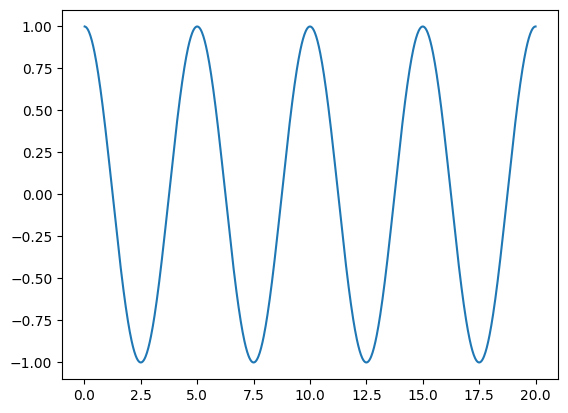

In [13]:
plt.plot(times, p, label='Suzuki-order2')

In [23]:
trotter_time_evolution.execute()

## Dataframe
- returns a pandas dataframe which has easy plotting and saving of data

<Axes: xlabel='Time'>

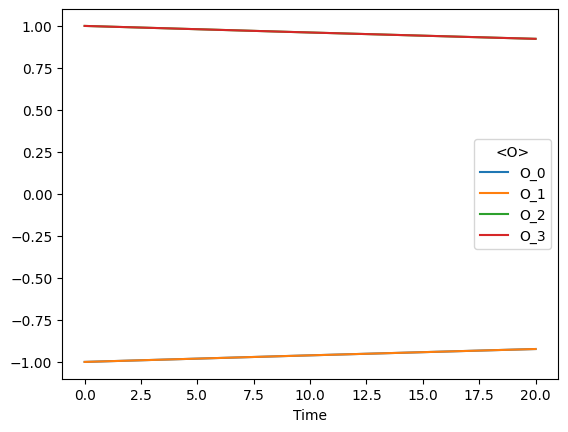

In [24]:
trotter_time_evolution.evolved_measuremets.plot()